In [1]:
import pandas as pd


In [2]:
idades = [11, 11, 10, 10, 12, 11, 13]
df = pd.DataFrame(idades, columns=['idades'])
df

,idades
0,11
1,11
2,10
3,10
4,12
5,11
6,13


In [4]:
df.groupby('idades')['idades'].count().to_frame('Frequência').reset_index()

,idades,Frequência
0,10,2
1,11,3
2,12,1
3,13,1


In [5]:
escola = df.groupby('idades')['idades'].count().to_frame('Frequência').reset_index()
escola['Frequência'] = escola['Frequência'].mul(10)
escola

,idades,Frequência
0,10,20
1,11,30
2,12,10
3,13,10


In [7]:
escola.describe()

,idades,Frequência
count,4.000000,4.000000
mean,11.500000,17.500000
std,1.290994,9.574271
min,10.000000,10.000000
25%,10.750000,10.000000
50%,11.500000,15.000000
75%,12.250000,22.500000
max,13.000000,30.000000


In [8]:
dataset = r'https://raw.githubusercontent.com/rafaelpuyau/infinity_school/main/ds/datasets/wines.csv'

In [9]:
df = pd.read_csv(dataset)

In [11]:
df.describe()

,vintage,price,quantity,rate
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2001.404200,213.907129,8.015500,87.484200
std,11.550375,134.010508,4.280244,7.475717
min,1982.000000,50.010000,1.000000,75.000000
25%,1991.000000,105.617500,4.000000,81.000000
50%,2001.000000,178.240000,8.000000,88.000000
75%,2011.000000,294.087500,12.000000,94.000000
max,2021.000000,1107.890000,15.000000,100.000000


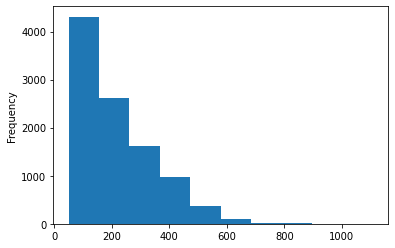

In [13]:
df['price'].plot(kind='hist')

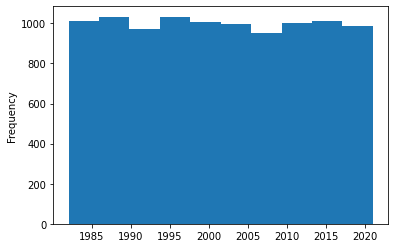

In [14]:
df['vintage'].plot(kind='hist')

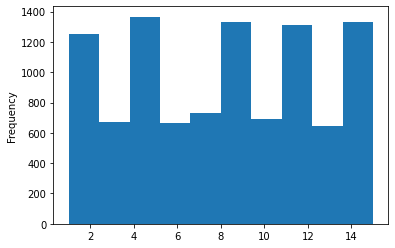

In [15]:
df['quantity'].plot(kind='hist')
# Multimodal

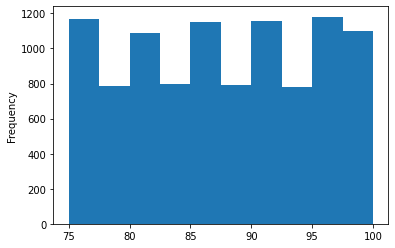

In [16]:
df['rate'].plot(kind='hist')
# Multimodal

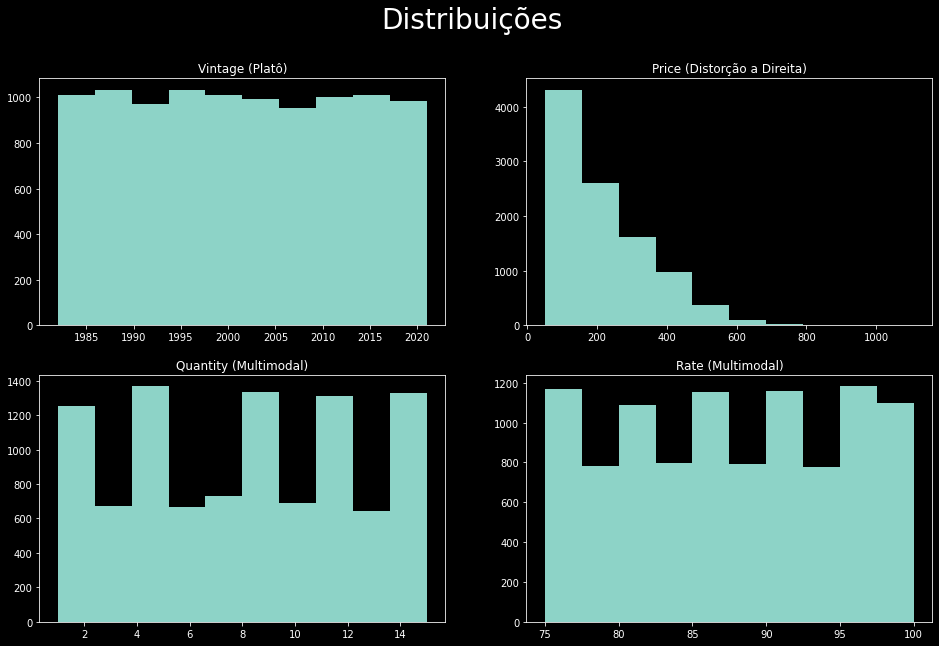

In [29]:
from matplotlib import pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Distribuições', fontsize=28)

ax[0, 0].hist(df['vintage'])
ax[0, 0].set_title('Vintage (Platô)')

ax[0, 1].hist(df['price'])
ax[0, 1].set_title('Price (Distorção a Direita)')

ax[1, 0].hist(df['quantity'])
ax[1, 0].set_title('Quantity (Multimodal)')

ax[1, 1].hist(df['rate'])
ax[1, 1].set_title('Rate (Multimodal)')

plt.show()

In [31]:
df['price'].describe()

count    10000.000000
mean       213.907129
std        134.010508
min         50.010000
25%        105.617500
50%        178.240000
75%        294.087500
max       1107.890000
Name: price, dtype: float64

In [32]:
# 3Q - 1Q = IIQ
# Q1 - 1,5 * IIQ -> Outlier inferior
# Q3 + 1,5 * IIQ -> Outlier superior

In [37]:
iQ = 294.087500 - 105.617500

print(294.087500 + 1.5 * iQ)
print(105.617500 -(1.5 * iQ))

576.7924999999999
-177.08749999999992


In [42]:
df[df['price'] > 576].shape[0]

128